In [0]:
import tensorflow as tf
from tensorflow import keras

#Import from notebook

In [0]:
# get access to the drive to get data and notebooks needed
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# path for the notebooks used
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [0]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=d590fc1bdc38a32d0ff68ebc5199985b34405cff672a6dbd2e861aa7f4de74e7
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [0]:
# import the notebook that contains the data and functions for training
import import_ipynb
import MRNet_models_processing as processing

importing Jupyter notebook from MRNet_models_processing.ipynb


Using TensorFlow backend.


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
unzip:  cannot find or open /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip, /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.zip or /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.ZIP.


# pop layers from VGG

In [0]:
# pop layers from the model to get the feature extractor
def pop_layers(model:keras.Model):
  for i in range(6):
    model.pop()
    
  return model  

# Binary classifier

In [0]:
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=1024 , activation = 'relu' , input_dim = 512 ))
  binary_class.add(keras.layers.Dense(units=512 , activation = 'relu' ))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4),metrics=['acc'])
  return binary_class

In [0]:
binary_classifier().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 1,050,625
Trainable params: 1,050,625
Non-trainable params: 0
_________________________________________________________________


# Train classifiers

## test neurons 4096

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.axial,processing.abnormal,processing.extractor)
model_axial_abnormal = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
51/51 [==============================] - 1s 12ms/step - loss: 0.5179 - acc: 0.8004 - val_loss: 0.4701 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - 1s 11ms/step - loss: 0.4468 - acc: 0.8083 - val_loss: 0.4635 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - 1s 12ms/step - loss: 0.4408 - acc: 0.8083 - val_loss: 0.4579 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - 1s 12ms/step - loss: 0.4306 - acc: 0.8083 - val_loss: 0.4534 - val_acc: 0.8053
Epoch 5/50
51/51 [==============================] - 1s 12ms/step - loss: 0.4213 - acc: 0.8083 - val_loss: 0.4484 - val_acc: 0.8053
Epoch 6/50
51/51 [==============================] - 1s 12ms/step - loss: 0.4146 - acc: 0.8073 - val_loss: 0.4472 - val_acc: 0.7965
Epoch 7/50
51/51 [==============================] - 1s 11ms/step - loss: 0.4082 - acc: 0.8092 - val_loss: 0.4589 - val_acc: 0.7788
Epoch 8/50
51/51 [==============================] - 1s 12ms/step - loss: 0.4103 - a

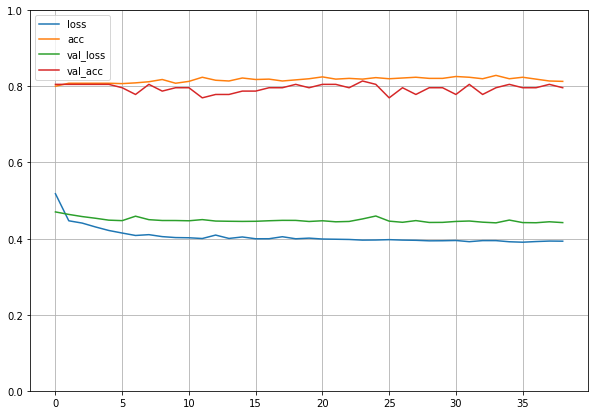

In [0]:
# test with neurons = 4096
processing.train_classifier(model_axial_abnormal, model_classifier , processing.vgg , processing.axial , processing.abnormal)

In [0]:
processing.test_classifier(model_axial_abnormal, model_classifier ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 4ms/step - loss: 0.4962 - acc: 0.7917


[0.4961872696876526, 0.7916666865348816]

## test neurons 128 then 64

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.axial,processing.abnormal,processing.extractor)
model_axial_abnormal = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
45/51 [=========================>....] - ETA: 0s - loss: 0.6796 - acc: 0.7967
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.6776 - acc: 0.8014 - val_loss: 0.6631 - val_acc: 0.8053
Epoch 2/50
46/51 [==========================>...] - ETA: 0s - loss: 0.6459 - acc: 0.8054
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.6434 - acc: 0.8083 - val_loss: 0.6255 - val_acc: 0.8053
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 0.6007 - acc: 0.8052
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.5984 - acc: 0.8083 - val_loss: 0.5777 - val_acc: 0.8053
Epoch 4/50
44/51 [========================>.....] - ETA: 0s - loss: 0.5498 - acc: 0.8102
Epoch 00004: val_acc did not improve from 0.80531
51/

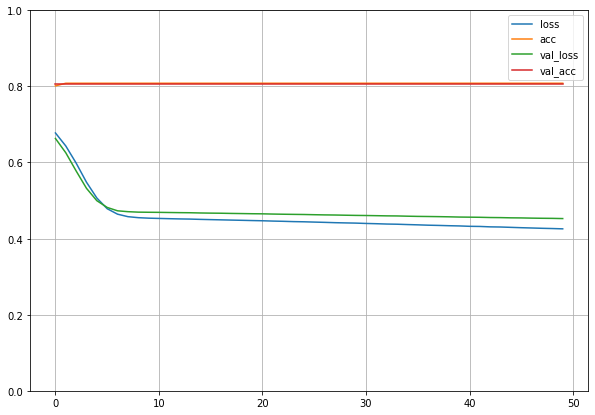

In [0]:
# test with neurons = 128 to 64
processing.train_classifier(model_axial_abnormal, model_classifier , processing.vgg , processing.axial , processing.abnormal)

In [0]:
processing.test_classifier(model_axial_abnormal, model_classifier ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.4821 - acc: 0.7917


[0.48214370012283325, 0.7916666865348816]

## test with learning rate 0.01

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.axial,processing.abnormal,processing.extractor)
model_axial_abnormal = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
44/51 [========================>.....] - ETA: 0s - loss: 0.4723 - acc: 0.7932
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 13ms/step - loss: 0.4739 - acc: 0.7925 - val_loss: 0.4722 - val_acc: 0.8053
Epoch 2/50
46/51 [==========================>...] - ETA: 0s - loss: 0.4367 - acc: 0.8054
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4332 - acc: 0.8083 - val_loss: 0.4512 - val_acc: 0.8053
Epoch 3/50
47/51 [==========================>...] - ETA: 0s - loss: 0.4014 - acc: 0.8170
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4080 - acc: 0.8122 - val_loss: 0.4668 - val_acc: 0.7434
Epoch 4/50
41/51 [=======================>......] - ETA: 0s - loss: 0.4274 - acc: 0.8037
Epoch 00004: val_acc did not improve from 0.80531
51

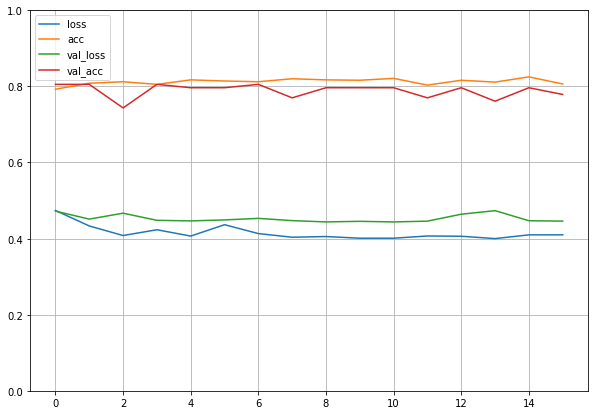

In [0]:
# test with neurons = 128 to 64  lr = 0.01
processing.train_classifier(model_axial_abnormal, model_classifier , processing.vgg , processing.axial , processing.abnormal)

In [0]:
processing.test_classifier(model_axial_abnormal, model_classifier ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.4797 - acc: 0.8000


[0.47972458600997925, 0.800000011920929]

## Test lr = 0.1

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.axial,processing.abnormal,processing.extractor)
model_axial_abnormal = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
47/51 [==========================>...] - ETA: 0s - loss: 0.5007 - acc: 0.7840
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 16ms/step - loss: 0.4943 - acc: 0.7906 - val_loss: 0.5053 - val_acc: 0.8053
Epoch 2/50
49/51 [===========================>..] - ETA: 0s - loss: 0.4859 - acc: 0.8102
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4870 - acc: 0.8083 - val_loss: 0.4682 - val_acc: 0.8053
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 0.4293 - acc: 0.8115
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4304 - acc: 0.8122 - val_loss: 0.4459 - val_acc: 0.8053
Epoch 4/50
44/51 [========================>.....] - ETA: 0s - loss: 0.4104 - acc: 0.8068
Epoch 00004: val_acc did not improve from 0.80531
51

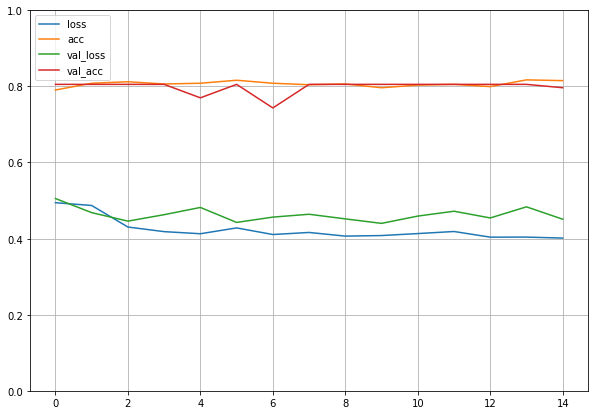

In [0]:
# test with neurons = 128 to 64  lr = 0.1
processing.train_classifier(model_axial_abnormal, model_classifier , processing.vgg , processing.axial , processing.abnormal)

In [0]:
processing.test_classifier(model_axial_abnormal, model_classifier ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 2ms/step - loss: 0.5312 - acc: 0.7917


[0.5312260985374451, 0.7916666865348816]

## test neurons = 64 to 64 lr = 0.01

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.axial,processing.abnormal,processing.extractor)
model_axial_abnormal = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
43/51 [========================>.....] - ETA: 0s - loss: 0.5087 - acc: 0.8105
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 17ms/step - loss: 0.5034 - acc: 0.8083 - val_loss: 0.4658 - val_acc: 0.8053
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 0.4390 - acc: 0.8033
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4363 - acc: 0.8083 - val_loss: 0.4469 - val_acc: 0.8053
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 0.4140 - acc: 0.8091
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4089 - acc: 0.8092 - val_loss: 0.4746 - val_acc: 0.7965
Epoch 4/50
38/51 [=====================>........] - ETA: 0s - loss: 0.4072 - acc: 0.8263
Epoch 00004: val_acc did not improve from 0.80531
51

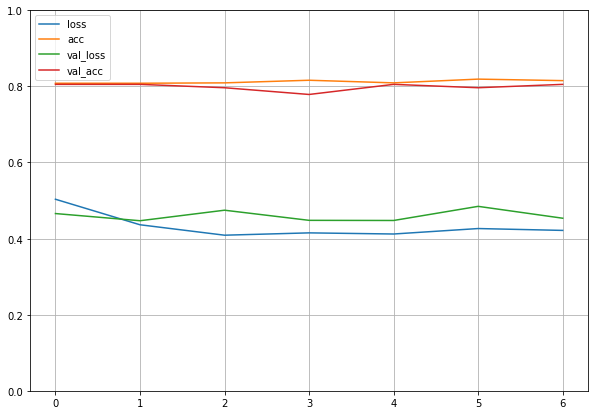

In [0]:
# test with neurons = 64 to 64  lr = 0.01
processing.train_classifier(model_axial_abnormal, model_classifier , processing.vgg , processing.axial , processing.abnormal)

In [0]:
processing.test_classifier(model_axial_abnormal, model_classifier ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.5110 - acc: 0.7917


[0.5109924674034119, 0.7916666865348816]

# Axial Abnormal

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.axial,processing.abnormal,processing.extractor)
model_axial_abnormal = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
41/51 [=======================>......] - ETA: 0s - loss: 0.6352 - acc: 0.8195
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 15ms/step - loss: 0.6224 - acc: 0.8083 - val_loss: 0.5315 - val_acc: 0.8053
Epoch 2/50
35/51 [===================>..........] - ETA: 0s - loss: 0.4917 - acc: 0.7943
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 0.4656 - acc: 0.8083 - val_loss: 0.4701 - val_acc: 0.8053
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4519 - acc: 0.8095
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4529 - acc: 0.8083 - val_loss: 0.4678 - val_acc: 0.8053
Epoch 4/50
37/51 [====================>.........] - ETA: 0s - loss: 0.4274 - acc: 0.8243
Epoch 00004: val_acc did not improve from 0.80531
51

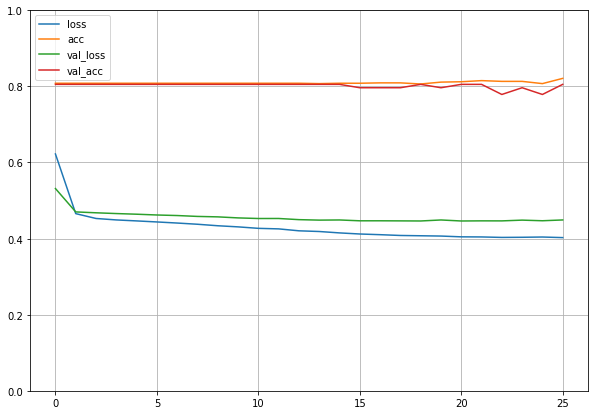

In [0]:
processing.train_classifier(model_axial_abnormal, model_classifier , processing.vgg , processing.axial , processing.abnormal)

In [0]:
processing.test_classifier(model_axial_abnormal, model_classifier ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 2ms/step - loss: 0.4918 - acc: 0.8000


[0.4918324649333954, 0.800000011920929]

#Axial ACL

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.axial,processing.acl,processing.extractor)
model_axial_acl = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6738 - acc: 0.8083
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16/Classifier/axial_acl.h5
51/51 [==============================] - 1s 28ms/step - loss: 0.6670 - acc: 0.8122 - val_loss: 0.6196 - val_acc: 0.8496
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 0.5747 - acc: 0.8156
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.5707 - acc: 0.8122 - val_loss: 0.4828 - val_acc: 0.8496
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 0.4974 - acc: 0.8080
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4905 - acc: 0.8122 - val_loss: 0.4308 - val_acc: 0.8496
Epoch 4/50
44/51 [========================>.....] - ETA: 0s - loss: 0.4917 - acc: 0.8068
Epoch 00004: val_acc did not improve from 0.84956
51/51 [

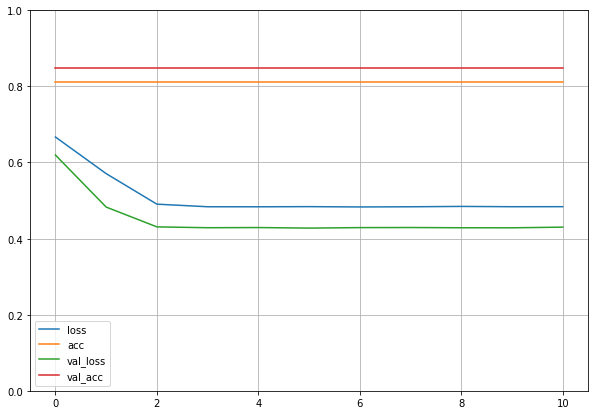

In [0]:
processing.train_classifier(model_axial_acl, model_classifier , processing.vgg , processing.axial , processing.acl)

In [0]:
processing.test_classifier(model_axial_acl, model_classifier ,processing.axial , processing.acl)

4/4 [==============================] - 0s 2ms/step - loss: 0.8557 - acc: 0.5500


[0.8557091951370239, 0.550000011920929]

# Axial Meniscal 

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.axial,processing.meniscal,processing.extractor)
model_axial_meniscal = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6820 - acc: 0.6440
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.6795 - acc: 0.6431 - val_loss: 0.6588 - val_acc: 0.6637
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6528 - acc: 0.6476
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 0.6517 - acc: 0.6470 - val_loss: 0.6347 - val_acc: 0.6637
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6431 - acc: 0.6464
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 0.6423 - acc: 0.6470 - val_loss: 0.6297 - val_acc: 0.6637
Epoch 4/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6399 - acc: 0.6464
Epoch 00004: val_acc did not improve from 0.66372
51/

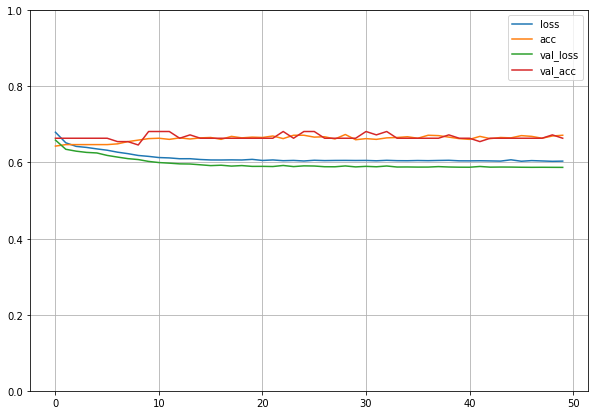

In [0]:
processing.train_classifier(model_axial_meniscal, model_classifier , processing.vgg , processing.axial , processing.meniscal)

In [0]:
processing.test_classifier(model_axial_meniscal, model_classifier ,processing.axial , processing.meniscal)

4/4 [==============================] - 0s 3ms/step - loss: 0.7157 - acc: 0.5500


[0.7157040238380432, 0.550000011920929]

# Saggital Abnormal

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.sagittal,processing.abnormal,processing.extractor)
model_saggital_abnormal = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
44/51 [========================>.....] - ETA: 0s - loss: 0.6508 - acc: 0.7932
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 2s 42ms/step - loss: 0.6418 - acc: 0.7965 - val_loss: 0.5784 - val_acc: 0.8053
Epoch 2/50
49/51 [===========================>..] - ETA: 0s - loss: 0.5244 - acc: 0.8061
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 6ms/step - loss: 0.5205 - acc: 0.8083 - val_loss: 0.4928 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4903 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.4903 - acc: 0.8083 - val_loss: 0.4916 - val_acc: 0.8053
Epoch 4/50
41/51 [=======================>......] - ETA: 0s - loss: 0.4983 - acc: 0.8024
Epoch 00004: val_acc did not improve from 0.80531

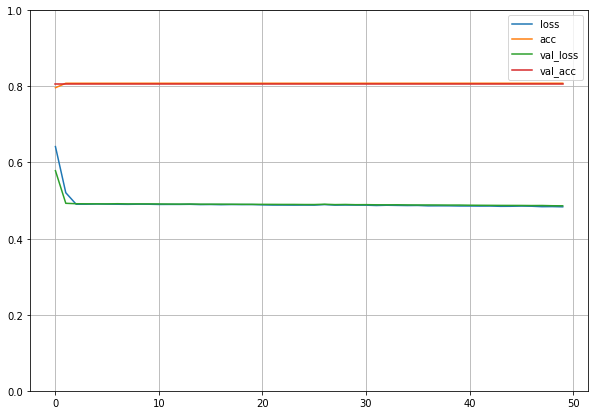

In [0]:
processing.train_classifier(model_saggital_abnormal, model_classifier , processing.vgg , processing.sagittal , processing.abnormal)

In [0]:
processing.test_classifier(model_saggital_abnormal, model_classifier ,processing.sagittal , processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.5124 - acc: 0.7917


[0.5123723745346069, 0.7916666865348816]

#Saggital Acl

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.sagittal,processing.acl,processing.extractor)
model_saggital_acl = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
44/51 [========================>.....] - ETA: 0s - loss: 0.6515 - acc: 0.7784
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16/Classifier/sagittal_acl.h5
51/51 [==============================] - 2s 39ms/step - loss: 0.6415 - acc: 0.7866 - val_loss: 0.5557 - val_acc: 0.8496
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 0.5120 - acc: 0.8178
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.5151 - acc: 0.8122 - val_loss: 0.4294 - val_acc: 0.8496
Epoch 3/50
38/51 [=====================>........] - ETA: 0s - loss: 0.4700 - acc: 0.8197
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4808 - acc: 0.8122 - val_loss: 0.4224 - val_acc: 0.8496
Epoch 4/50
44/51 [========================>.....] - ETA: 0s - loss: 0.4815 - acc: 0.8114
Epoch 00004: val_acc did not improve from 0.84956
51/5

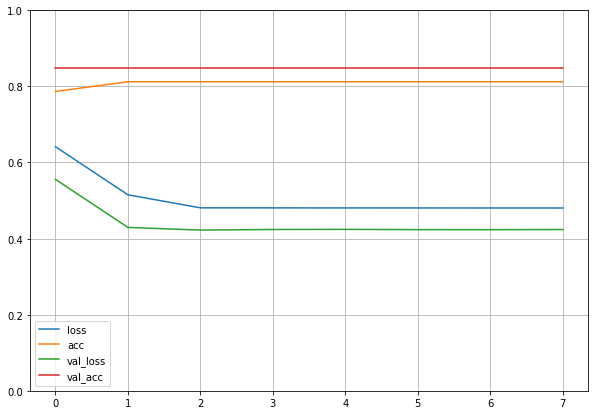

In [0]:
processing.train_classifier(model_saggital_acl, model_classifier , processing.vgg , processing.sagittal , processing.acl)

In [0]:
processing.test_classifier(model_saggital_acl, model_classifier ,processing.sagittal , processing.acl)

4/4 [==============================] - 0s 3ms/step - loss: 0.8563 - acc: 0.5500


[0.856303870677948, 0.550000011920929]

# Saggital Meniscal

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.sagittal,processing.meniscal,processing.extractor)
model_saggital_meniscal = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
45/51 [=========================>....] - ETA: 0s - loss: 0.6821 - acc: 0.6456
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 2s 33ms/step - loss: 0.6806 - acc: 0.6450 - val_loss: 0.6624 - val_acc: 0.6637
Epoch 2/50
38/51 [=====================>........] - ETA: 0s - loss: 0.6589 - acc: 0.6447
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 5ms/step - loss: 0.6558 - acc: 0.6470 - val_loss: 0.6407 - val_acc: 0.6637
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.6492 - acc: 0.6470
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 5ms/step - loss: 0.6492 - acc: 0.6470 - val_loss: 0.6385 - val_acc: 0.6637
Epoch 4/50
40/51 [======================>.......] - ETA: 0s - loss: 0.6639 - acc: 0.6225
Epoch 00004: val_acc did not improve from 0.66372

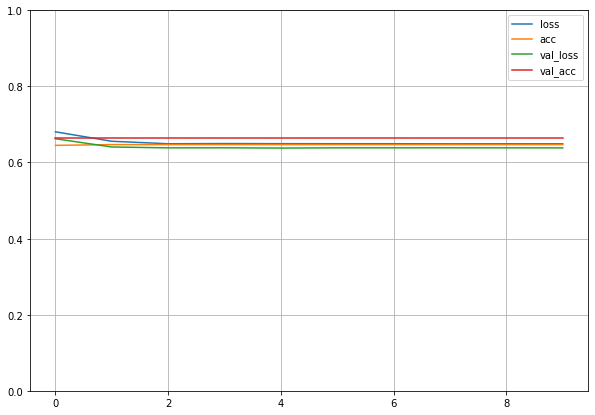

In [0]:
processing.train_classifier(model_saggital_meniscal, model_classifier , processing.vgg , processing.sagittal , processing.meniscal)

In [0]:
processing.test_classifier(model_saggital_meniscal, model_classifier ,processing.sagittal , processing.meniscal)

4/4 [==============================] - 0s 3ms/step - loss: 0.6950 - acc: 0.5667


[0.695049524307251, 0.5666666626930237]

#Coronal Abnormal

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.coronal,processing.abnormal,processing.extractor)
model_coronal_abnormal = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
43/51 [========================>.....] - ETA: 0s - loss: 0.6462 - acc: 0.8047
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Classifier/coronal_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.6341 - acc: 0.8083 - val_loss: 0.5674 - val_acc: 0.8053
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 0.5174 - acc: 0.8033
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.5090 - acc: 0.8083 - val_loss: 0.5014 - val_acc: 0.8053
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 0.5014 - acc: 0.8057
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4977 - acc: 0.8083 - val_loss: 0.5009 - val_acc: 0.8053
Epoch 4/50
45/51 [=========================>....] - ETA: 0s - loss: 0.4963 - acc: 0.8078
Epoch 00004: val_acc did not improve from 0.80531
5

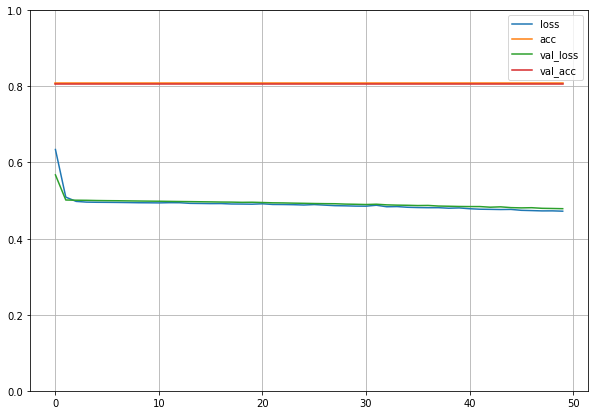

In [0]:
processing.train_classifier(model_coronal_abnormal, model_classifier , processing.vgg , processing.coronal , processing.abnormal)

In [0]:
processing.test_classifier(model_coronal_abnormal, model_classifier ,processing.coronal , processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.5051 - acc: 0.7917


[0.5050572156906128, 0.7916666865348816]

#Coronal Acl

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.coronal,processing.acl,processing.extractor)
model_coronal_acl = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
45/51 [=========================>....] - ETA: 0s - loss: 0.6629 - acc: 0.8144
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16/Classifier/coronal_acl.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.6580 - acc: 0.8122 - val_loss: 0.5950 - val_acc: 0.8496
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.5518 - acc: 0.8167
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.5464 - acc: 0.8122 - val_loss: 0.4547 - val_acc: 0.8496
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 0.4782 - acc: 0.8170
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4858 - acc: 0.8122 - val_loss: 0.4302 - val_acc: 0.8496
Epoch 4/50
45/51 [=========================>....] - ETA: 0s - loss: 0.4865 - acc: 0.8100
Epoch 00004: val_acc did not improve from 0.84956
51/51 

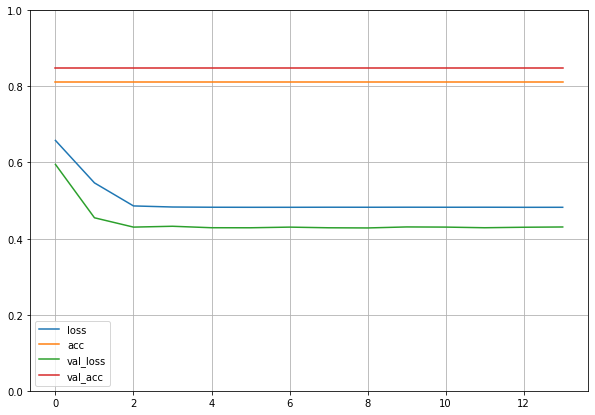

In [0]:
processing.train_classifier(model_coronal_acl, model_classifier , processing.vgg , processing.coronal , processing.acl)

In [0]:
processing.test_classifier(model_coronal_acl, model_classifier ,processing.coronal , processing.acl)

4/4 [==============================] - 0s 5ms/step - loss: 0.8552 - acc: 0.5500


[0.8552066683769226, 0.550000011920929]

#Coronal Meniscal

In [0]:
model_temp1 =  processing.load_model(processing.vgg,processing.coronal,processing.meniscal,processing.extractor)
model_coronal_meniscal = pop_layers(model_temp1)
model_classifier = binary_classifier()

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6816 - acc: 0.6429
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16/Classifier/coronal_meniscus.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.6799 - acc: 0.6391 - val_loss: 0.6616 - val_acc: 0.6637
Epoch 2/50
44/51 [========================>.....] - ETA: 0s - loss: 0.6530 - acc: 0.6534
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 0.6554 - acc: 0.6470 - val_loss: 0.6413 - val_acc: 0.6637
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 0.6513 - acc: 0.6420
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 0.6486 - acc: 0.6470 - val_loss: 0.6401 - val_acc: 0.6637
Epoch 4/50
44/51 [========================>.....] - ETA: 0s - loss: 0.6495 - acc: 0.6455
Epoch 00004: val_acc did not improve from 0.66372
5

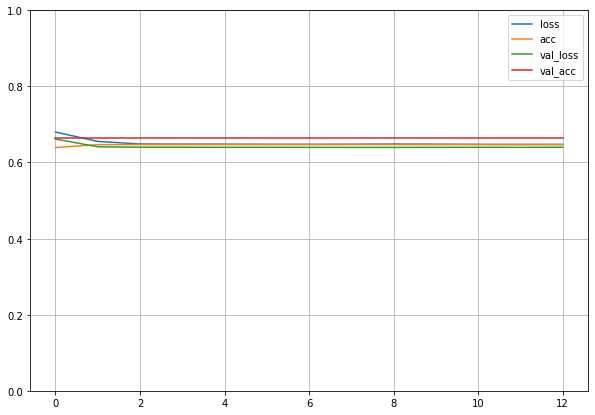

In [0]:
processing.train_classifier(model_coronal_meniscal, model_classifier , processing.vgg , processing.coronal , processing.meniscal)

In [0]:
processing.test_classifier(model_coronal_meniscal, model_classifier ,processing.coronal , processing.meniscal)

4/4 [==============================] - 0s 2ms/step - loss: 0.6951 - acc: 0.5667


[0.6951411962509155, 0.5666666626930237]

#Logistic Regressor

In [0]:
def regressor():  
  log_reg = keras.models.Sequential()
  log_reg.add(keras.layers.Dense(units=1 , activation = 'sigmoid' , input_dim = 3))
  log_reg.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(0.01),metrics=['acc'])
  return log_reg

# Train Regressors

##Test with regularization

(1017, 3)
(113, 3)
Epoch 1/50
40/51 [======================>.......] - ETA: 0s - loss: 0.8693 - acc: 0.2625
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Regressor/abnormal.h5
51/51 [==============================] - 2s 32ms/step - loss: 0.8217 - acc: 0.3825 - val_loss: 0.6154 - val_acc: 0.8053
Epoch 2/50
44/51 [========================>.....] - ETA: 0s - loss: 0.5543 - acc: 0.8102
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.5515 - acc: 0.8083 - val_loss: 0.5218 - val_acc: 0.8053
Epoch 3/50
46/51 [==========================>...] - ETA: 0s - loss: 0.5075 - acc: 0.8120
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 0.5118 - acc: 0.8083 - val_loss: 0.5110 - val_acc: 0.8053
Epoch 4/50
44/51 [========================>.....] - ETA: 0s - loss: 0.5158 - acc: 0.8011
Epoch 00004: val_acc did not improve fro

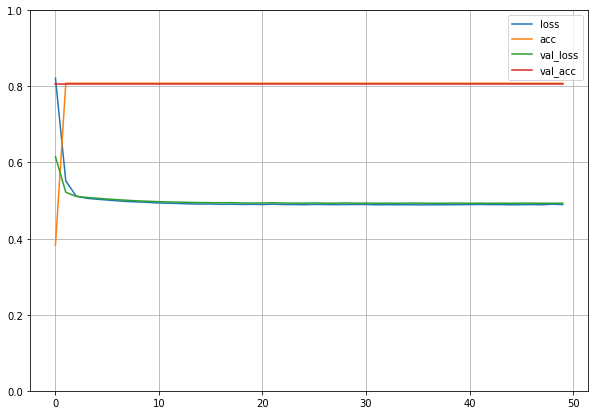

In [0]:
# regularizer 0.01
logistic_rogressor = regressor()
processing.train_regressor(logistic_rogressor,loaded_model_axial_abnormal,loaded_model_saggital_abnormal,loaded_model_coronal_abnormal,processing.vgg,processing.abnormal)

##Abnormal

In [0]:
# get extractor of axial series for abnormal anomaly 
loaded_model_axial_abnormal = processing.load_model(processing.vgg,processing.axial,processing.abnormal,processing.extractor)
loaded_model_axial_abnormal = pop_layers(loaded_model_axial_abnormal)

In [0]:
# get extractor of sagittal series for abnormal anomaly
loaded_model_saggital_abnormal = processing.load_model(processing.vgg,processing.sagittal,processing.abnormal,processing.extractor)
loaded_model_saggital_abnormal = pop_layers(loaded_model_saggital_abnormal)

In [0]:
# get extractor of Coronal series for abnormal anomaly
loaded_model_coronal_abnormal = processing.load_model(processing.vgg,processing.coronal,processing.abnormal,processing.extractor)
loaded_model_coronal_abnormal = pop_layers(loaded_model_coronal_abnormal)

(1017, 3)
(113, 3)
Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 0.6543 - acc: 0.6020
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16/Regressor/abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.6467 - acc: 0.6136 - val_loss: 0.5260 - val_acc: 0.8053
Epoch 2/50
49/51 [===========================>..] - ETA: 0s - loss: 0.4927 - acc: 0.8112
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4960 - acc: 0.8083 - val_loss: 0.4901 - val_acc: 0.8053
Epoch 3/50
27/51 [==============>...............] - ETA: 0s - loss: 0.4783 - acc: 0.8130
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4843 - acc: 0.8083 - val_loss: 0.4893 - val_acc: 0.8053
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 0.4839 - acc: 0.8080
Epoch 00004: val_acc did not improve from

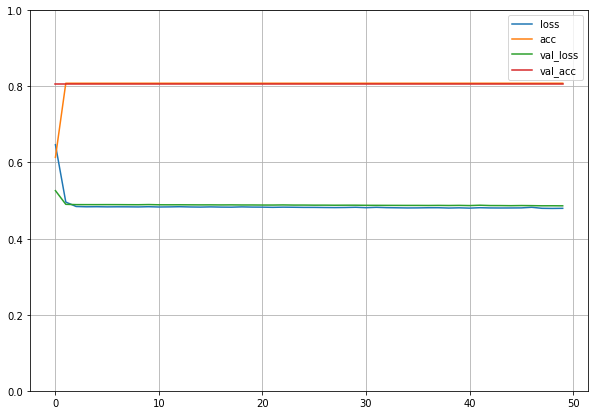

In [0]:
#lr  = 0.01 and no regularization
logistic_rogressor = regressor()
processing.train_regressor(logistic_rogressor,loaded_model_axial_abnormal,loaded_model_saggital_abnormal,loaded_model_coronal_abnormal,processing.vgg,processing.abnormal)

In [0]:
processing.test_regressor(loaded_model_axial_abnormal,loaded_model_saggital_abnormal,loaded_model_coronal_abnormal,processing.vgg,processing.abnormal)

4/4 [==============================] - 0s 2ms/step - loss: 0.5356 - acc: 0.7917


[0.5355910658836365, 0.7916666865348816]

##ACL

In [0]:
# get extractor of axial series for acl anomaly
loaded_model_axial_acl = processing.load_model(processing.vgg,processing.axial,processing.acl,processing.extractor)
loaded_model_axial_acl = pop_layers(loaded_model_axial_acl)

In [0]:
# get extractor of sagittal series for acl anomaly
loaded_model_saggital_acl = processing.load_model(processing.vgg,processing.sagittal,processing.acl,processing.extractor)
loaded_model_saggital_acl = pop_layers(loaded_model_saggital_acl)

In [0]:
# get extractor of coronal series for acl anomaly
loaded_model_coronal_acl = processing.load_model(processing.vgg,processing.coronal,processing.acl,processing.extractor)
loaded_model_coronal_acl = pop_layers(loaded_model_coronal_acl)

(1017, 3)
(113, 3)
Epoch 1/50
48/51 [===========================>..] - ETA: 0s - loss: 0.8730 - acc: 0.2000
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16/Regressor/acl.h5
51/51 [==============================] - 1s 20ms/step - loss: 0.8624 - acc: 0.2311 - val_loss: 0.6667 - val_acc: 0.8496
Epoch 2/50
49/51 [===========================>..] - ETA: 0s - loss: 0.5880 - acc: 0.8102
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.5845 - acc: 0.8122 - val_loss: 0.4993 - val_acc: 0.8496
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.5090 - acc: 0.8090
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.5052 - acc: 0.8122 - val_loss: 0.4499 - val_acc: 0.8496
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 0.4888 - acc: 0.8110
Epoch 00004: val_acc did not improve from 0.8

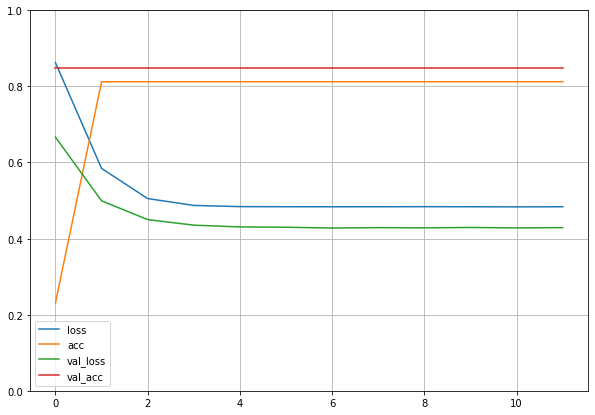

In [0]:
logistic_rogressor = regressor()
processing.train_regressor(logistic_rogressor,loaded_model_axial_acl,loaded_model_saggital_acl,loaded_model_coronal_acl,processing.vgg,processing.acl)

In [0]:
processing.test_regressor(loaded_model_axial_acl,loaded_model_saggital_acl,loaded_model_coronal_acl,processing.vgg,processing.acl)

4/4 [==============================] - 0s 2ms/step - loss: 0.6903 - acc: 0.5500


[0.6902922987937927, 0.550000011920929]

##MENISCAL

In [0]:
# get extractor of axial series for maniscal anomaly
loaded_model_axial_meniscal = processing.load_model(processing.vgg,processing.axial,processing.meniscal,processing.extractor)
loaded_model_axial_meniscal = pop_layers(loaded_model_axial_meniscal)

In [0]:
# get extractor of sagittal series for meniscal anomaly
loaded_model_saggital_meniscal = processing.load_model(processing.vgg,processing.sagittal,processing.meniscal,processing.extractor)
loaded_model_saggital_meniscal = pop_layers(loaded_model_saggital_meniscal)

In [0]:
# get extractor of coronal series for meniscal anomaly
loaded_model_coronal_meniscal = processing.load_model(processing.vgg,processing.coronal,processing.meniscal,processing.extractor)
loaded_model_coronal_meniscal = pop_layers(loaded_model_coronal_meniscal)

(1017, 3)
(113, 3)
Epoch 1/50
45/51 [=========================>....] - ETA: 0s - loss: 0.6808 - acc: 0.6078
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16/Regressor/meniscus.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.6760 - acc: 0.6175 - val_loss: 0.6552 - val_acc: 0.6637
Epoch 2/50
49/51 [===========================>..] - ETA: 0s - loss: 0.6641 - acc: 0.6480
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 0.6647 - acc: 0.6470 - val_loss: 0.6525 - val_acc: 0.6637
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 0.6632 - acc: 0.6469
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 0.6627 - acc: 0.6470 - val_loss: 0.6514 - val_acc: 0.6637
Epoch 4/50
47/51 [==========================>...] - ETA: 0s - loss: 0.6612 - acc: 0.6468
Epoch 00004: val_acc did not improve from

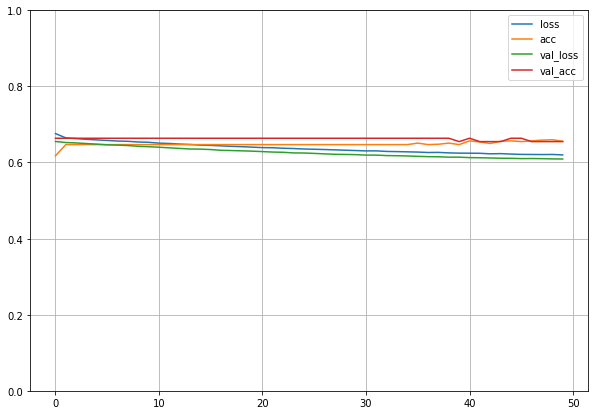

In [0]:
logistic_rogressor = regressor()
processing.train_regressor(logistic_rogressor,loaded_model_axial_meniscal,loaded_model_saggital_meniscal,loaded_model_coronal_meniscal,processing.vgg,processing.meniscal)

In [0]:
processing.test_regressor(loaded_model_axial_meniscal,loaded_model_saggital_meniscal,loaded_model_coronal_meniscal,processing.vgg,processing.meniscal)

4/4 [==============================] - 0s 3ms/step - loss: 0.6982 - acc: 0.5667


[0.6982162594795227, 0.5666666626930237]

# Predictions

In [0]:
def get_extractor(series,anomaly):
  extractor = processing.load_model(processing.vgg, series , anomaly, processing.extractor)
  extractor = pop_layers(extractor)
  return extractor

In [0]:
axial_abnormal_extractor =  get_extractor(processing.axial,processing.abnormal)

In [0]:
saggital_abnormal_extractor = get_extractor(processing.sagittal,processing.abnormal)

In [0]:
coronal_abnormal_extractor = get_extractor(processing.coronal,processing.abnormal)

In [0]:
axial_acl_extractor = get_extractor(processing.axial,processing.acl)

In [0]:
saggital_acl_extractor = get_extractor(processing.sagittal,processing.acl)

In [0]:
coronal_acl_extractor = get_extractor(processing.coronal,processing.acl)

In [0]:
axial_meniscal_extractor = get_extractor(processing.axial,processing.meniscal)

In [0]:
saggital_meniscal_extractor = get_extractor(processing.sagittal,processing.meniscal)

In [0]:
coronal_meniscal_extractor = get_extractor(processing.coronal,processing.meniscal)

In [0]:
extractors_list = [axial_abnormal_extractor ,saggital_abnormal_extractor,coronal_abnormal_extractor,axial_abnormal_extractor ,saggital_abnormal_extractor,coronal_abnormal_extractor , axial_abnormal_extractor ,saggital_abnormal_extractor,coronal_abnormal_extractor  ]

In [0]:
extractors_list = [axial_meniscal_extractor , saggital_meniscal_extractor , coronal_meniscal_extractor , axial_meniscal_extractor , saggital_meniscal_extractor , coronal_meniscal_extractor , axial_meniscal_extractor , saggital_meniscal_extractor , coronal_meniscal_extractor]

In [0]:
input_axial , output_axial = processing.get_data_test(processing.axial,processing.abnormal,start=0,batch_size=1)
input_saggital , output_saggital = processing.get_data_test(processing.sagittal,processing.abnormal,start=0,batch_size=1)
input_coronal , output_coronal = processing.get_data_test(processing.coronal,processing.abnormal,start=0,batch_size=1)

In [0]:
processing.predict(extractors_list,input_axial ,input_saggital ,input_coronal ,processing.vgg)

abnormal : [[0.6789321]]%
acl : [[0.47528234]]%
meniscus : [[0.3920375]]%
